In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
# first i will investigate the population density of each neighborhood in Pittsburgh
# need to calculate population/square footage
population = pd.read_csv("pghPopulation2020.csv")
population.head(20)

# iterate through csv and get 2020 population for each neighbohood
# create dictionary w/ neighborhood: population format
neighPop = dict()
for nhood, row in population.iterrows():
    neighPop[row["Neighborhood"]] = row["2020_Total_Population"]
    
print(neighPop)

{'Allegheny Center': 1419, 'Allegheny West': 540, 'Allentown': 2305, 'Arlington - Arlington Heights (Combined)': 2040, 'Banksville': 4127, 'Bedford Dwellings': 1386, 'Beechview': 7596, 'Beltzhoover': 1604, 'Bloomfield': 8665, 'Bluff': 5882, 'Bon Air': 759, 'Brighton Heights': 7105, 'Brookline': 13063, 'California-Kirkbride': 709, 'Carrick': 10290, 'Central Business District (Downtown)': 5477, 'Central Lawrenceville': 4720, 'Central Northside': 2972, 'Central Oakland': 5835, 'Chartiers City': 492, 'Chateau': 19, 'Crafton Heights': 3999, 'Crawford-Roberts': 2293, 'Duquesne Heights': 2397, 'East Allegheny': 1903, 'East Carnegie': 491, 'East Hills': 2892, 'East Liberty': 6187, 'Elliott': 2193, 'Esplen': 322, 'Fairywood': 1092, 'Fineview': 1140, 'Friendship': 1963, 'Garfield': 3643, 'Glen Hazel': 659, 'Greenfield': 7261, 'Hays': 321, 'Hazelwood': 3889, 'Highland Park': 6235, 'Homewood North': 2617, 'Homewood South': 2260, 'Homewood West': 642, 'Knoxville': 3493, 'Larimer': 1545, 'Lincoln Pl

In [6]:
# now that I have the population, I will get the square footage
sqMiles = dict()
area = pd.read_csv("neighborhoodArea.csv")
area.head(10)
cols = area.columns
for nh, row in area.iterrows():
    sqMiles[row["hood"]] = row["sqmiles"]
    
miles = list(sqMiles.keys())
miles.sort()
sortedMiles = {i: sqMiles[i] for i in miles}

sortedMiles['Perry North'] = 1.212
print(sortedMiles)


{'Allegheny Center': 0.21, 'Allegheny West': 0.141, 'Allentown': 0.295, 'Arlington': 0.47, 'Arlington Heights': 0.132, 'Banksville': 0.969, 'Bedford Dwellings': 0.179, 'Beechview': 1.46, 'Beltzhoover': 0.421, 'Bloomfield': 0.702, 'Bluff': 0.327, 'Bon Air': 0.313, 'Brighton Heights': 1.117, 'Brookline': 2.082, 'California-Kirkbride': 0.217, 'Carrick': 1.673, 'Central Business District': 0.64, 'Central Lawrenceville': 0.963, 'Central Northside': 0.259, 'Central Oakland': 0.281, 'Chartiers City': 0.132, 'Chateau': 0.383, 'Crafton Heights': 0.754, 'Crawford-Roberts': 0.258, 'Duquesne Heights': 0.623, 'East Allegheny': 0.236, 'East Carnegie': 0.432, 'East Hills': 0.541, 'East Liberty': 0.581, 'Elliott': 0.606, 'Esplen': 0.23, 'Fairywood': 0.969, 'Fineview': 0.25, 'Friendship': 0.106, 'Garfield': 0.457, 'Glen Hazel': 0.456, 'Greenfield': 0.773, 'Hays': 1.75, 'Hazelwood': 1.583, 'Highland Park': 1.163, 'Homewood North': 0.434, 'Homewood South': 0.398, 'Homewood West': 0.199, 'Knoxville': 0.30

In [7]:
# combine dictionaries to get population density
populationDensity = dict()
for x in sortedMiles:
    if x in neighPop and sortedMiles.get(x) != 0:
        print(x + ":")
        print(f"Population: {neighPop.get(x)} people")
        print(f"Square Miles: {sortedMiles.get(x)} sq mi")
        
        populationDensity[x] = neighPop.get(x)/sortedMiles.get(x)
        print(f"Population Density: {populationDensity.get(x)} people/sq mi\n")
    if x == "Arlington":
        populationDensity['Arlington - Arlington Heights (combined)'] = neighPop.get('Arlington - Arlington Heights (Combined)')/ (sortedMiles.get('Arlington') + sortedMiles.get('Arlington Heights'))
        print('Arlington - Arlington Heights (combined)' + ":")
        print(f"Population: {neighPop.get('Arlington - Arlington Heights (Combined)')} people")
        print(f"Square Miles: {sortedMiles.get('Arlington') + sortedMiles.get('Arlington Heights')} mi")
        print(f"{populationDensity['Arlington - Arlington Heights (combined)']} people/sq mi\n")
        
popDen = sorted(populationDensity.items(), key=lambda x:x[1])
finalDensity = dict(popDen)
top10PopDen = dict()
top3PopDen = dict()
count = 0

# get lowest 10 neighborhoods
for x in finalDensity:
    top10PopDen[x] = finalDensity[x]
    count = count + 1
    
    if count == 10:
        break
    
# get lowest 3 neighborhoods
for x in finalDensity:
    top3PopDen[x] = finalDensity[x]
    count = count + 1
    
    if count == 3:
        break
        
print(top3PopDen)





Allegheny Center:
Population: 1419 people
Square Miles: 0.21 sq mi
Population Density: 6757.142857142858 people/sq mi

Allegheny West:
Population: 540 people
Square Miles: 0.141 sq mi
Population Density: 3829.7872340425533 people/sq mi

Allentown:
Population: 2305 people
Square Miles: 0.295 sq mi
Population Density: 7813.559322033899 people/sq mi

Arlington - Arlington Heights (combined):
Population: 2040 people
Square Miles: 0.602 mi
3388.7043189368774 people/sq mi

Banksville:
Population: 4127 people
Square Miles: 0.969 sq mi
Population Density: 4259.029927760578 people/sq mi

Bedford Dwellings:
Population: 1386 people
Square Miles: 0.179 sq mi
Population Density: 7743.016759776537 people/sq mi

Beechview:
Population: 7596 people
Square Miles: 1.46 sq mi
Population Density: 5202.739726027397 people/sq mi

Beltzhoover:
Population: 1604 people
Square Miles: 0.421 sq mi
Population Density: 3809.9762470308788 people/sq mi

Bloomfield:
Population: 8665 people
Square Miles: 0.702 sq mi
Pop

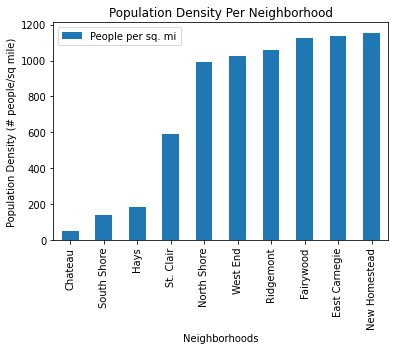

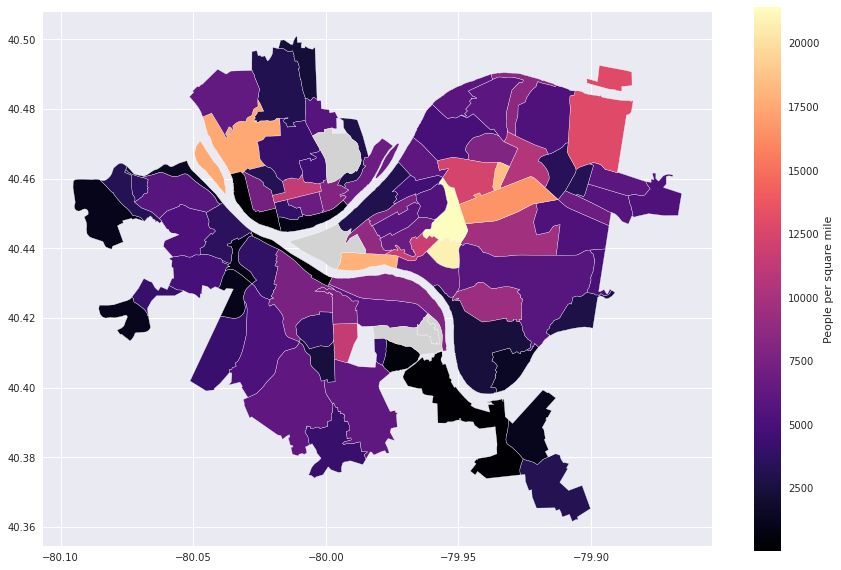

In [8]:
# alright, we have the population density
# now let's make some data visualizations !!

# let's make a bar graph
import pandas as pd
import geopandas
%matplotlib inline

df = pd.DataFrame([top3PopDen])
df2 = pd.DataFrame([top10PopDen])

df.name = "Population Density in Pgh Neighborhoods"
df2.name = "Population Density in Pgh Neighborhoods"

df = df.transpose()
df2 = df2.transpose()

df = df.rename(columns={0: 'People per sq. mi'})
df2 = df2.rename(columns={0: 'People per sq. mi'})

# bar graph it
df2.plot(kind="bar", xlabel="Neighborhoods",ylabel="Population Density (# people/sq mile)", title="Population Density Per Neighborhood")
plt.style.use('seaborn')

#let's try a map
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
density_map = neighborhoods.merge(df, how='left', left_on='hood', right_on=df.index) # merge !!
# draw a choropleth map using data from the column named "number_of_steps"
density_map.plot(column='People per sq. mi', # set the data to be used for coloring
               cmap='magma',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "People per square mile"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )